In [197]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns

In [198]:
# read csv file
beijing = pd.read_csv('new.csv', encoding = 'unicode_escape', low_memory=False)

### A Glance

**Context** Housing price of Beijing from *2011* to *2017*, fetching from Lianjia.com

In [199]:
# take a look at the data
beijing.head(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [200]:
beijing.shape

(318851, 26)

In [201]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

In [202]:
beijing.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [203]:
# drop url column since the id column is unique identifier for each instance
print(beijing.url.nunique() == beijing.id.nunique() == beijing.shape[0])
df = beijing.drop(['url'], axis=1)

# reset id column as index of the table
df.set_index(['id'], inplace=True)

# take a look at the column names now
print(df.columns)

True
Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers', 'totalPrice',
       'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
       'floor', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage'],
      dtype='object')


In [204]:
# look for columns containing NaN type information
print(df.isna().any())

Lng                    False
Lat                    False
Cid                    False
tradeTime              False
DOM                     True
followers              False
totalPrice             False
price                  False
square                 False
livingRoom             False
drawingRoom            False
kitchen                False
bathRoom               False
floor                  False
buildingType            True
constructionTime       False
renovationCondition    False
buildingStructure      False
ladderRatio            False
elevator                True
fiveYearsProperty       True
subway                  True
district               False
communityAverage        True
dtype: bool


In [205]:
# we are going to take a look at these columns (with DOM info)
temp1 = df[['DOM', 'buildingType', 'elevator', 'fiveYearsProperty', 'subway', 'communityAverage']]
temp1_null = temp1[pd.isnull(temp1).any(axis=1)]
temp1_null.shape

(159475, 6)

In [206]:
print('column name: (# of nulls in the temp1 df,  # of nulls in the original df)')
print('buildingType: (', temp1_null.buildingType.isnull().sum(), ', ', 318851 - 316830, ')')
print('elevator: (', temp1_null.elevator.isnull().sum(), ', ', 318851 - 318819, ')')
print('fiveYearsProperty: (', temp1_null.fiveYearsProperty.isnull().sum(), ', ', 318851 - 318819, ')')
print('subway: (', temp1_null.subway.isnull().sum(), ', ', 318851 - 318819, ')')
print('communityAverage: (', temp1_null.communityAverage.isnull().sum(), ', ', 318851 - 318388, ')')

column name: (# of nulls in the temp1 df,  # of nulls in the original df)
buildingType: ( 2021 ,  2021 )
elevator: ( 32 ,  32 )
fiveYearsProperty: ( 32 ,  32 )
subway: ( 32 ,  32 )
communityAverage: ( 463 ,  463 )


In [207]:
# columns containing NaN values (without DOM info)
temp2 = df[['buildingType', 'elevator', 'fiveYearsProperty', 'subway', 'communityAverage']]
temp2_null = temp2[pd.isnull(temp2).any(axis=1)]
temp2_null.shape

(2403, 5)

In [208]:
print('column name: (# of nulls in the temp1 df,  # of nulls in the original df)')
print('buildingType: (', temp2_null.buildingType.isnull().sum(), ', ', 318851 - 316830, ')')
print('elevator: (', temp2_null.elevator.isnull().sum(), ', ', 318851 - 318819, ')')
print('fiveYearsProperty: (', temp2_null.fiveYearsProperty.isnull().sum(), ', ', 318851 - 318819, ')')
print('subway: (', temp2_null.subway.isnull().sum(), ', ', 318851 - 318819, ')')
print('communityAverage: (', temp2_null.communityAverage.isnull().sum(), ', ', 318851 - 318388, ')')

column name: (# of nulls in the temp1 df,  # of nulls in the original df)
buildingType: ( 2021 ,  2021 )
elevator: ( 32 ,  32 )
fiveYearsProperty: ( 32 ,  32 )
subway: ( 32 ,  32 )
communityAverage: ( 463 ,  463 )


In [209]:
temp2_null.describe()

,buildingType,elevator,fiveYearsProperty,subway,communityAverage
count,382.000000,2371.000000,2371.000000,2371.000000,1940.000000
mean,2.745296,0.198650,0.500633,0.396457,47100.667526
std,1.333256,0.399068,0.500105,0.489265,19381.038030
min,0.048000,0.000000,0.000000,0.000000,20483.000000
25%,2.000000,0.000000,0.000000,0.000000,34781.000000
50%,3.000000,0.000000,1.000000,0.000000,43245.000000
75%,4.000000,0.000000,1.000000,1.000000,54892.000000
max,4.000000,1.000000,1.000000,1.000000,183109.000000


In [210]:
# columns containing NaN values (without DOM info)
temp3 = df[['buildingType', 'elevator', 'fiveYearsProperty', 'subway', 'communityAverage']]
temp3_null = temp3[pd.isnull(temp3[['elevator', 'fiveYearsProperty', 'subway']]).any(axis=1)]
temp3_null

,buildingType,elevator,fiveYearsProperty,subway,communityAverage
id,,,,,
BJ0000615040,0.500,NaN,NaN,NaN,39492.0
BJ0000615084,0.333,NaN,NaN,NaN,37588.0
BJ0000615132,0.333,NaN,NaN,NaN,38753.0
BJ0000615138,0.500,NaN,NaN,NaN,36923.0
BJ0000615208,0.125,NaN,NaN,NaN,39492.0
BJ0000615220,0.500,NaN,NaN,NaN,36923.0
BJ0000615222,0.500,NaN,NaN,NaN,38753.0
BJ0000615229,0.333,NaN,NaN,NaN,39381.0
BJ0000615401,0.500,NaN,NaN,NaN,36358.0


#### What we got so far:
- According to Pandas' document, **The 50 percentile is the same as the median**. That is, if we look at the `temp2_null.describe()` above, the distribution of the '*communityAverage*' column is skewed to the right (mean > median); in the original data set, the mean of the communityAverage is 63682.446305 and the median is 59015.000000, meaning that in the original data set, the distribution of the communityAverage is also skewed to the right. 
- The instances containing the NaN values (regardless the DOM column) mainly fall on the left side of the distribution of the original data set respect to the communityAverage column. One potential reason why these instances fall in the lower communityAverate price zone is that these properties are located in the suburb area. We will verify this hypothesis later when we make the lng/lat agains the total price and the community price. 
- Subway explanation is not provided by the uploader of the data set. I selected several instances and went into the original pages tried to find some information. The instances with NaN values in the subway column that I looked, there were no information about the subway condition, and on the map these properties are far away from major public transportations. The instances with value 1 in the subway column generally have subway station nearby and the distances are less than 1000m from the properties to nearest subway station. Those has value 0 in the subway column, in the original webpage, they ether have no information about the nearby subway or the nearest subway station is more than 1000m away.Consider there are only 32 instances containing NaN value in the subway column. I'm considering either set these value to 0 or simply remove them from the dataset.
- In `temp3_null` we can see that the instances with no *elevator, fiveYearsProperty, subway* informations are the same instances. Interesting thing is that the buildingType column, these 32 instances has value less than 1. Which is bizarre, because in the column explanation: buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ). I think these data are bad data. since 32 is a very small number compare to 318851, I believe it is safe to remove these instances from the original dataset.

### Data Cleaning

In [211]:
# as promised previously, i will drop the instances with buildingType value smaller than 1.
df = df.dropna(axis=0, subset=['elevator'])
df.shape

(318819, 24)

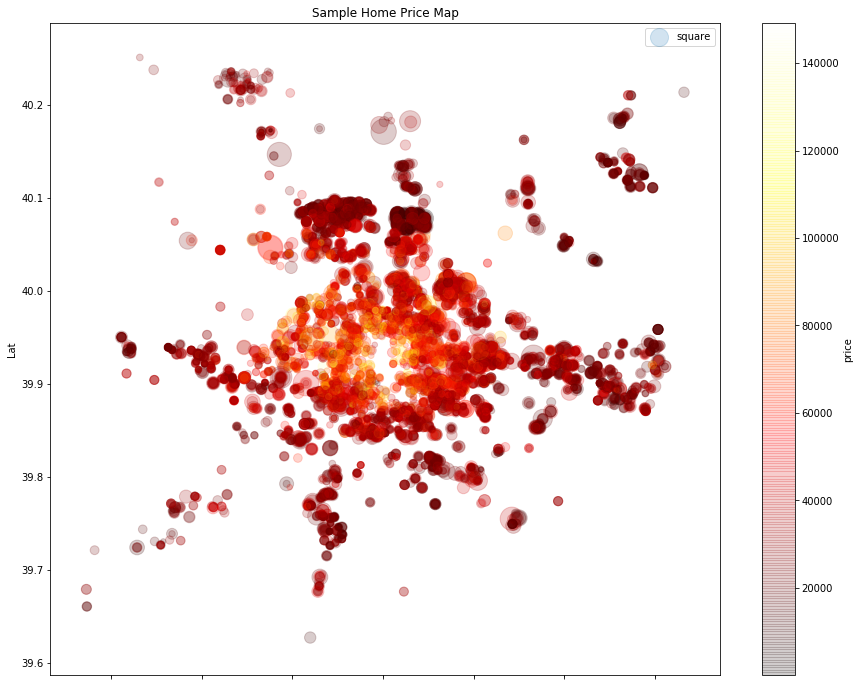

In [212]:
# now let's take a look at the geographical information of the data.
# because the original dataset is way to large, I will sample some instances to plot it, n=10000
smpl = df.sample(n=10000, random_state=1)

smpl.plot(kind="scatter", x="Lng", y='Lat', alpha=0.2, s=(smpl['square']/3)**1.3, label='square', c='price', cmap=plt.get_cmap('hot'), colorbar=True, figsize=(15, 12))
plt.title('Sample Home Price Map')
plt.legend()

#### There are many things going on in the image:
1. each circle is a property instances and the location on the axis represents the actual location of the property on the map (with the longitude and latitude information).
2. the size of the circle represents the size (square meters) of the property sold.
3. the heatmap is showing the price per square meter of the property. The lighter the color is, the higher price per square meter the property is.
4. the empty area in the middle of the image is the "heart" of Beijing, which is where the government facilities located (that's why no homes for sale around the area). 
5. notice the top part of the government owned area is slightly more price (yellower) than the bottom part. This is because those two areas are the district of finance and commerce. 
6. the 'spikes' are subway lines. The further away from the center of beijing, the lower the price per square meter. also notice that the circle sizes near the subway lines are generally smaller than the other areas. This should be because there are mainly apartment complex in the area, which these home owners are mainly relying on public transportation when they need to go out.'
7. there are some pretty large properties located near the "heart" of Beijing. I'm not surprised because there are some really wealthy people living there since Beijing is the capital of China. 
8. on the north side of the circle, there is an very dark area has many properties and relatively low per square meter price. This area is near the subway line 13 and 15. These two lines were built after 2010. It is less convenient for living (less shops and other entertainment places). I lived near the area shortly before. 

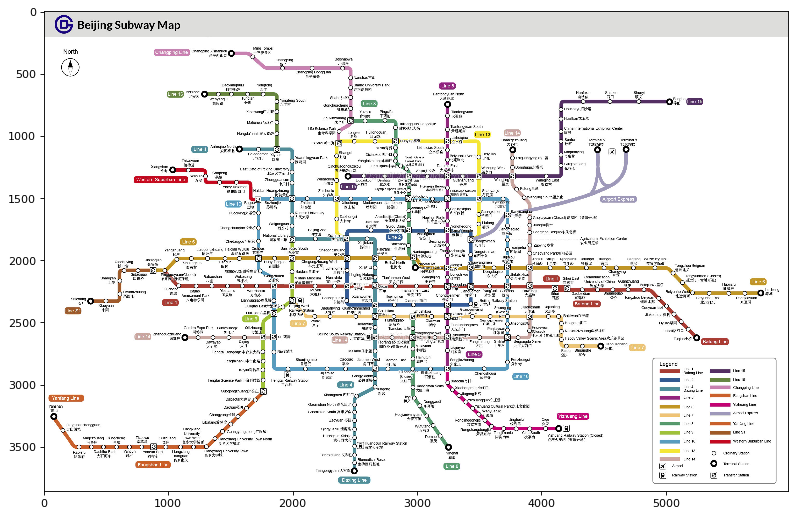

In [213]:
# here is a map for Beijing subway as an illustration of the location associate with the image we plotted previously.
figure(num=None, figsize=(12, 12), dpi=80)

img=mpimg.imread('subway.jpg')
imgplot = plt.imshow(img, aspect='equal')
plt.show()

In [214]:
# I viewed the data set in Excel and realized in some columns the data contains Chinese charactors, 
# which after writing into Pandas DataFrame they become some random charactors. 
# for example in the 'floor' column, there are characters "高，中，低" meaning "High, Mid, Low". 
# It follows by the exact floor number. 
# I believe I can safely remove these Chinese characters without loosing information of the data.
df['floor'] = df.floor.str.replace('^[^\d]*', '').astype(float)

# change livingRoom and drawingRoom columns from object type to float type
df['livingRoom'] = df.livingRoom.astype(float)
df['drawingRoom'] = df.drawingRoom.astype(float)
df['bathRoom'] = df.bathRoom.astype(float)

In [252]:
# now we have tradeTime and constructionTime columns are object type,
# since these are time series information, we will leave them as is for now.
# also the DOM, buildingType, and communityAverage columns still have null values,
# we will fix them now.
temp4 = df[['DOM', 'buildingType', 'communityAverage', 'price', 'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'bathRoom', 'renovationCondition', 'district']]
building_null = temp4[pd.isnull(temp4[['buildingType']]).any(axis=1)]
community_null = temp4[pd.isnull(temp4[['communityAverage']]).any(axis=1)]
print(building_null.shape, community_null.shape)

(2021, 11) (463, 11)


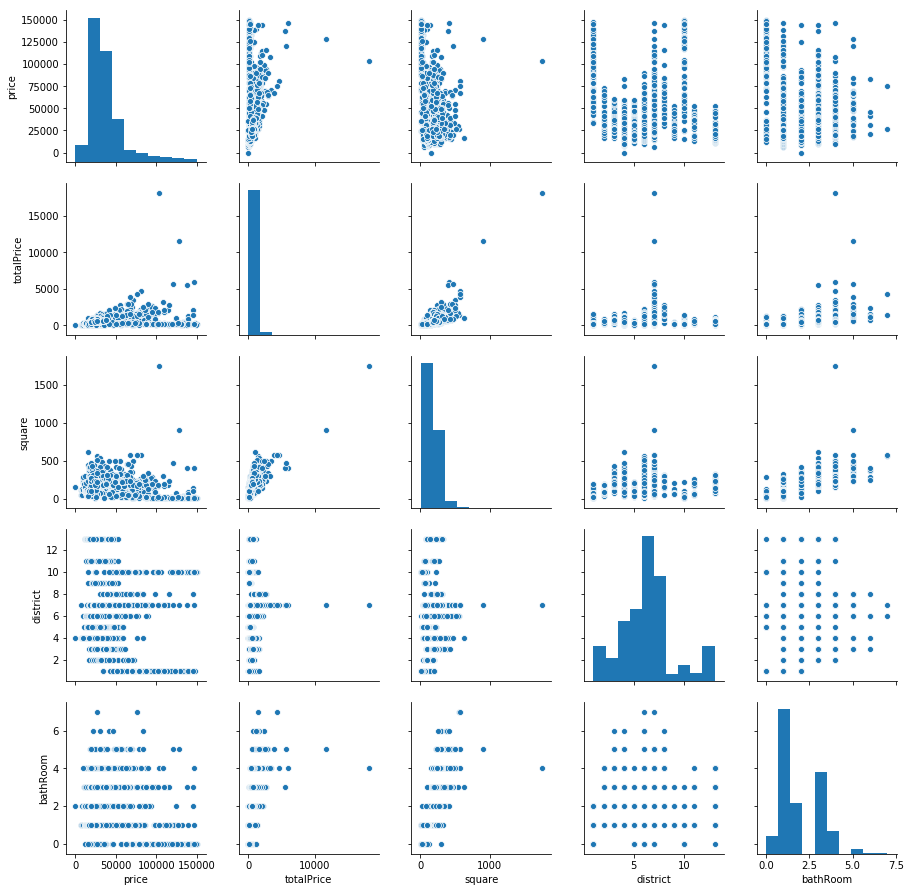

In [216]:
# notice there are two significant outliers here. Let's take a look at these two guys.
sns.pairplot(building_null[['price', 'totalPrice', 'square', 'district', 'bathRoom']])

In [217]:
# Let's take a look at the two significant outliers
building_null[building_null['totalPrice'] >= 10000]

,DOM,buildingType,communityAverage,price,totalPrice,square,livingRoom,drawingRoom,bathRoom,renovationCondition,district
id,,,,,,,,,,,
101101209445,32.0,NaN,108901.0,128036,11600.0,906.0,6.0,3.0,5.0,4,7
101101263750,29.0,NaN,88345.0,103868,18130.0,1745.5,6.0,3.0,4.0,1,7


In [243]:
# I double checked the home information, these are luxury townhomes / houses. 
# they are located near the center area of beijing but are very large in size and high in prices.
print(beijing[beijing['id'] == '101101209445']['url'])
print(beijing[beijing['id'] == '101101263750']['url'])

65440    https://bj.lianjia.com/chengjiao/101101209445....
Name: url, dtype: object
67868    https://bj.lianjia.com/chengjiao/101101263750....
Name: url, dtype: object


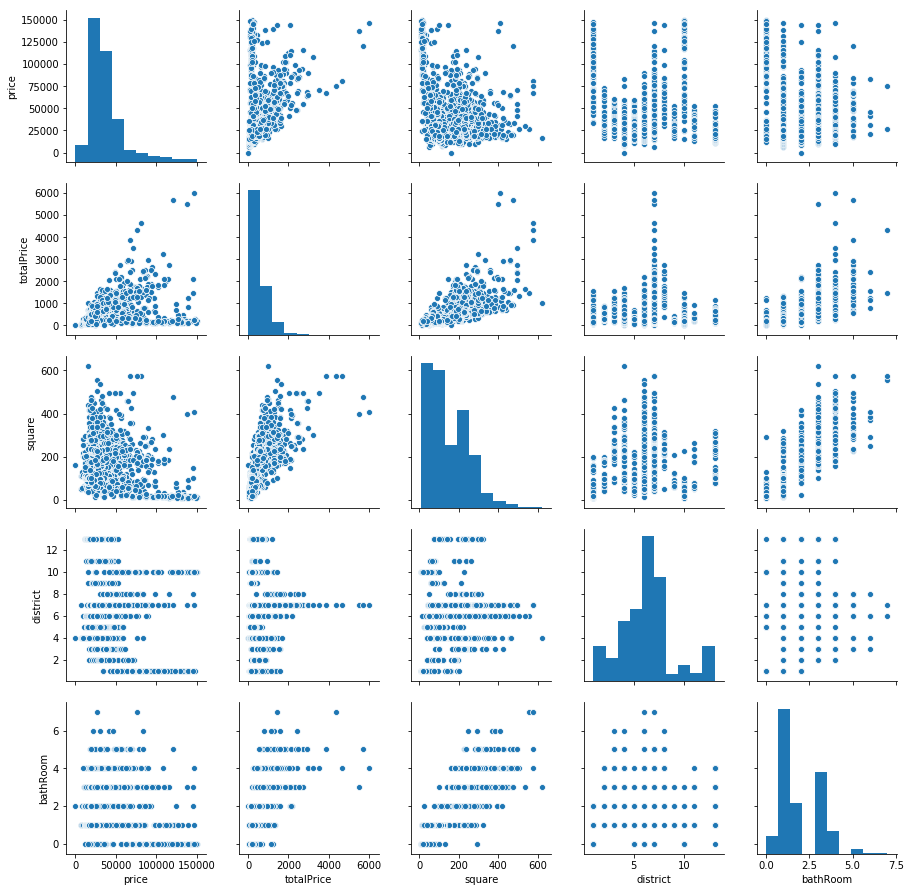

In [245]:
# how the pairplot looks like without these two extreme instances
no_outliers = building_null[building_null['totalPrice'] < 10000]
sns.pairplot(no_outliers[['price', 'totalPrice', 'square', 'district', 'bathRoom']])

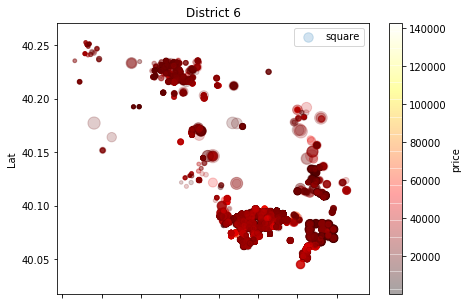

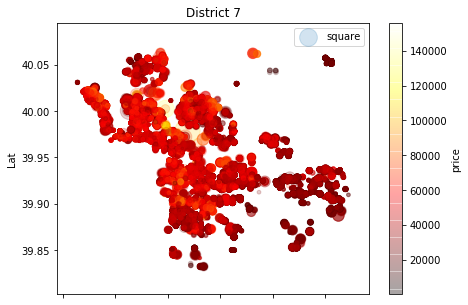

In [251]:
# from this pairplot we know that these properties without buildingType information fall into the lower price zone.
# majority of the properties are located in district 6 and district 7. 
# Let's take a look at how the price and square feet information look like in these two districts.
# from pairplot we can tell that in the subset of the data, district 7 has way higher total price
# But the price per square meter distributed relatively evenly.
# This is proved by the following plot, that district 7 is generally more pricy compare to district 6.
six = df[df.district == 6]
seven = df[df.district == 7]

six.plot(kind="scatter", x="Lng", y='Lat', alpha=0.2, s=(six['square']/5)**1.1, label='square', c='price', cmap=plt.get_cmap('hot'), colorbar=True, figsize=(7, 5))
plt.title('District 6')
seven.plot(kind="scatter", x="Lng", y='Lat', alpha=0.2, s=(seven['square']/5)**1.1, label='square', c='price', cmap=plt.get_cmap('hot'), colorbar=True, figsize=(7, 5))
plt.title('District 7')
plt.show()

Text(0.5, 1.0, 'Distribution of Price / Sqr Meter')

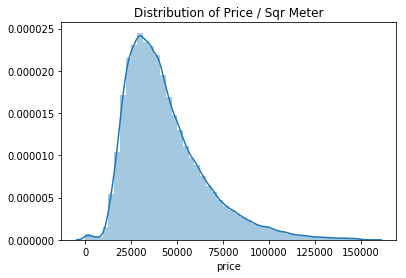

In [274]:
# see how the price and totalPrice is distributed of the whole dataset
sns.distplot(beijing.price)
plt.title('Distribution of Price / Sqr Meter')